<a href="https://colab.research.google.com/github/Sankarsh-Sunku/Implementation-Of-DL-in-Pytorch/blob/main/Overfitting/Training_a_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# NEW!
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

dataset = torch.tensor( iris[iris.columns[0:4]].values ).float()


In [4]:
labels = torch.zeros(len(dataset), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [5]:
# a function that creates the ANN model

def createANewModel():

  # model architecture
  ANNiris = nn.Sequential(
      nn.Linear(4,64),   # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,64),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,3),   # output units
        )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

  return ANNiris,lossfun,optimizer

In [6]:
# train the model

# global parameter
numepochs = 200

def trainTheModel(trainProp):

  # initialize losses
  losses = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # separate train from test data
    # Note 1: unique split for each epoch!
    # Note 2: here we specify the training size, not the testing size!
    X_train,X_test, y_train,y_test = train_test_split(dataset,labels, train_size=trainProp)


    # forward pass and loss
    yHat = ANNiris(X_train)
    loss = lossfun(yHat,y_train)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute training accuracy
    trainAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y_train).float()).item() )

    # test accuracy
    predlabels = torch.argmax( ANNiris(X_test),axis=1 )
    testAcc.append( 100*torch.mean((predlabels == y_test).float()).item() )

  # function output
  return trainAcc,testAcc


In [11]:
# create a model
ANNiris,lossfun,optimizer = createANewModel()

# train the model
# NOTE: the input is the training proportion, not the test proportion!
trainAcc,testAcc = trainTheModel(.8)

# print(testAcc)


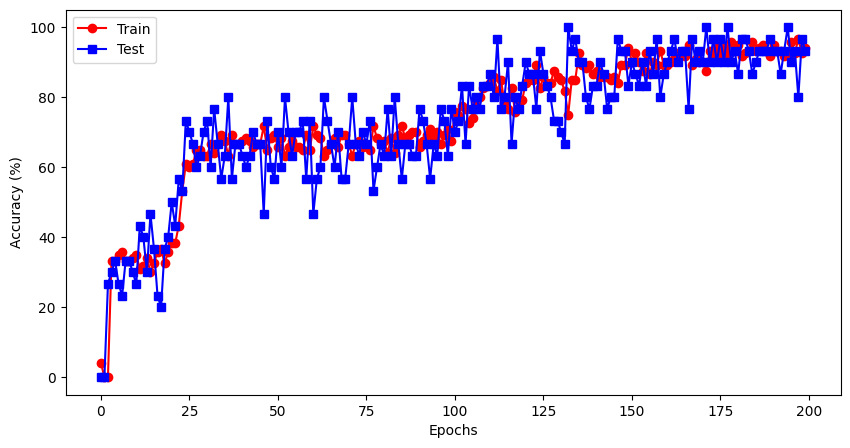

In [8]:
# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])
plt.show()

In [12]:
trainSetSizes = np.linspace(.2,.95,10)

allTrainAcc = np.zeros((len(trainSetSizes),numepochs))
allTestAcc = np.zeros((len(trainSetSizes),numepochs))

for i in range(len(trainSetSizes)):

  # create a model
  ANNiris,lossfun,optimizer = createANewModel()

  # train the model
  trainAcc,testAcc = trainTheModel(trainSetSizes[i])

  # store the results
  allTrainAcc[i,:] = trainAcc
  allTestAcc[i,:] = testAcc

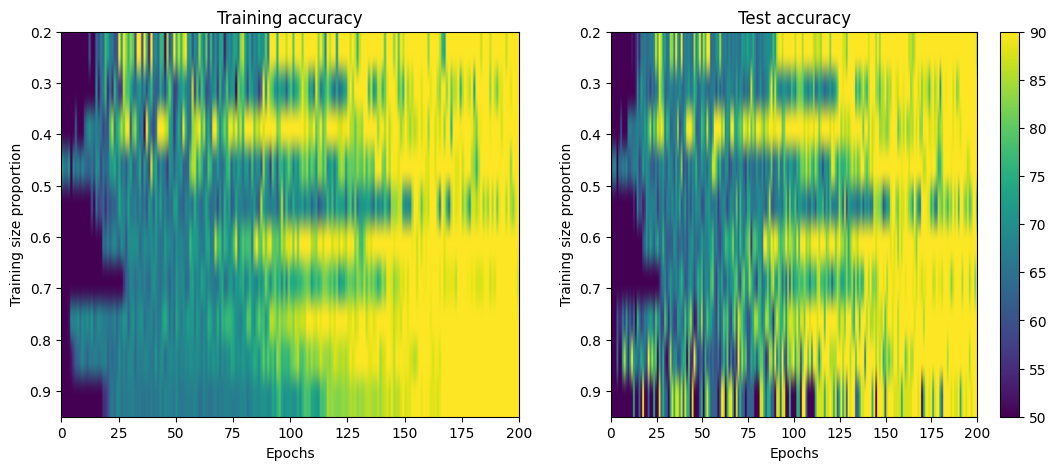

In [13]:
fig,ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(allTrainAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(allTestAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p,ax=ax[1])

plt.show()